In [91]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [293]:
class Markov_Chain_Sim():
    def __init__(self, name_list=['X','Y']):
        """
        """
        initial_state=[[1]]*len(name_list) 
        self.current_state = np.array(initial_state)
        self.update_matrix = np.identity(len(initial_state))
        self.name_to_index = {x:i for i,x in enumerate(name_list)}
            
    def modify_update_matrix(self, name_start, name_end, p):
        i_start = self.name_to_index[name_start]
        i_end = self.name_to_index[name_end]
        self.update_matrix[i_end][i_start] = p
        #Make sure the conservation in the column: 
        self.update_matrix[i_start][i_start] = self.update_matrix[i_start][i_start]-p
        
    def update_current_state(self):
        self.current_state = np.matmul(self.update_matrix,self.current_state)
        
    def display_markov_chain(self, node_size=2000, fig_name='None'):
        #Modified from https://vknight.org/unpeudemath/code/2015/11/15/Visualising-markov-chains.html
        G = nx.MultiDiGraph()
        labels={}
        edge_labels={}
        states = list(self.name_to_index.keys())

        for i, origin_state in enumerate(states):
            for j, destination_state in enumerate(states):
                rate = self.update_matrix[j][i]
                if rate > 0 and origin_state!=destination_state:
                    G.add_edge(origin_state,
                               destination_state,
                               weight=rate,
                               label="{:.02f}".format(rate))
                    edge_labels[(origin_state, destination_state)] = label="{:.02f}".format(rate)
         
        fig, ax = plt.subplots(figsize=(8,6))
        pos = nx.planar_layout(G)
        nx.draw_networkx_nodes(G, pos=pos, ax=ax, node_size=node_size, node_shape='o')
        nx.draw_networkx_labels(G, pos=pos)
        nx.draw_networkx_edges(
            G, pos=pos,
            width = [20*G.edges[edge]['weight'] for edge in G.edges],
            connectionstyle="arc3,rad=0.2", arrows=True,
            arrowsize=50,
            ax=ax
        )
        ax.axis('off')
        if fig_name!='None':
            fig.savefig(f'Results/{fig_name}.png')

{'X': 0, 'Y': 1, 'Z': 2}
[[0.58 0.1  0.25]
 [0.3  0.75 0.1 ]
 [0.12 0.15 0.65]]


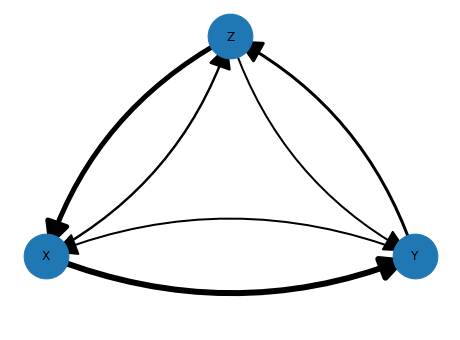

In [294]:
sim = Markov_Chain_Sim(name_list=['X','Y','Z'])
print(sim.name_to_index)

##x_to_y:0.3, 
sim.modify_update_matrix(name_start='X', name_end='Y', p=0.3)
##y_to_x: 0.1
sim.modify_update_matrix(name_start='Y', name_end='X', p=0.1)

sim.modify_update_matrix(name_start='Y', name_end='Z', p=0.15)
sim.modify_update_matrix(name_start='Z', name_end='Y', p=0.1)

sim.modify_update_matrix(name_start='X', name_end='Z', p=0.12)
sim.modify_update_matrix(name_start='Z', name_end='X', p=0.25)

print(sim.update_matrix)
sim.display_markov_chain(fig_name='simple_3_box_model')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


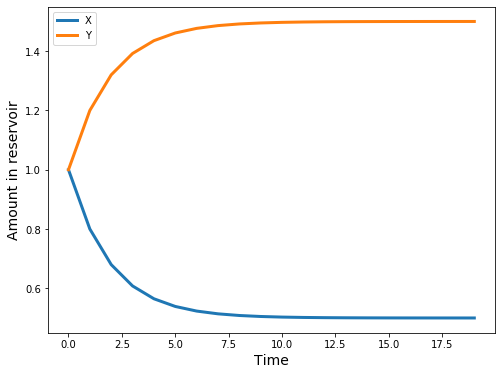

In [275]:
sim = Markov_Chain_Sim(name_list=['X','Y'])
sim.modify_update_matrix(name_start='X', name_end='Y', p=0.3)
sim.modify_update_matrix(name_start='Y', name_end='X', p=0.1)
all_states = []
time_range=20
for _ in range(time_range):
    all_states.append(sim.current_state)
    sim.update_current_state()
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Amount in reservoir', fontsize=14)

for node in sim.name_to_index.keys():
    ax.plot(range(time_range), [states[sim.name_to_index[node]][0] for states in all_states], 
            label=node, linewidth=3)
ax.legend()
fig.show()

## Replicate box model from paper: 

[[0.6  0.   0.05]
 [0.4  0.7  0.  ]
 [0.   0.3  0.95]]


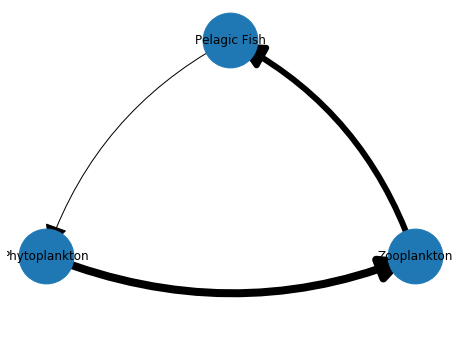

In [292]:
sim = Markov_Chain_Sim(name_list=['Phytoplankton','Zooplankton', 'Pelagic Fish'])
sim.modify_update_matrix(name_start='Phytoplankton', name_end='Zooplankton', p=0.4)
sim.modify_update_matrix(name_start='Zooplankton', name_end='Pelagic Fish', p=0.3)
sim.modify_update_matrix(name_start='Pelagic Fish', name_end='Phytoplankton', p=0.05)

print(sim.update_matrix)
sim.display_markov_chain(node_size=3000, fig_name='simple_3_box_model')